# Reimplemntation of Learning quantum algorithm for state overlap, Patrick Coles 2018.
this code is not learning the circuits but takes the result - Ancilla-Based ALgorithm and Bell-Basis Algorithm and comparing with standard SWAP test.
Run on ibm_torino

In [ ]:

# Load the Qiskit Runtime service
from qiskit_ibm_runtime import QiskitRuntimeService

# Load the Qiskit Runtime service

# Syntax for first saving your token.  Delete these lines after saving your credentials.
QiskitRuntimeService.save_account(channel='ibm_quantum_platform', instance = '', token='', overwrite=True, set_as_default=True)
service = QiskitRuntimeService(channel='ibm_quantum_platform')

# Load saved credentials
#service = QiskitRuntimeService()

# Use the least busy backend, or uncomment the loading of a specific backend like "ibm_brisbane".
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)
# backend = service.backend("ibm_brisbane")
print(backend.name)

ibm_torino


In [13]:
nshots = 10000
import warnings
warnings.simplefilter('ignore')

In [14]:
# importpackages
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

# importing Qiskit - Updated for Qiskit 1.0+
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import transpile
from qiskit_aer import Aer

# import basic plot tools
from qiskit.visualization import plot_histogram

# Circuit parameters
from qiskit.circuit import Parameter

# Job monitoring - Custom implementation for Qiskit 1.0+
import time
def job_monitor(job, interval=2):
    """Monitor job status and print updates"""
    while job.status() not in ['DONE', 'CANCELLED', 'ERROR']:
        print(f'Job Status: {job.status()}')
        time.sleep(interval)
    print(f'Job Status: {job.status()}')
    return job.status()

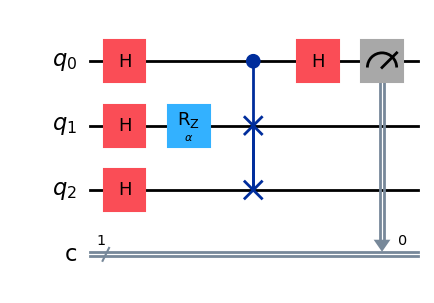

In [15]:
# SWAP
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
qc_swap = QuantumCircuit(qr,cr)

# rho
qc_swap.h(1)
alpha_swap = Parameter(r'$\alpha$')
qc_swap.rz(alpha_swap,1)
# sigma
qc_swap.h(2)

qc_swap.h(0)
qc_swap.cswap(0,1, 2)
qc_swap.h(0)
qc_swap.measure(0,0)
qc_swap.draw(output='mpl')

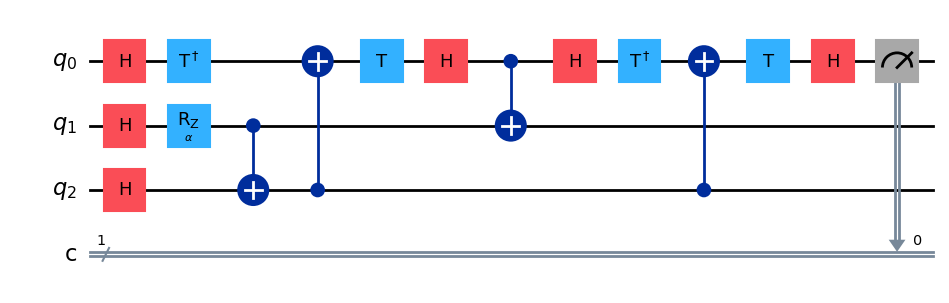

In [16]:
# ABA
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
qc_aba = QuantumCircuit(qr,cr)

# rho
qc_aba.h(1)
alpha_aba = Parameter(r'$\alpha$')
qc_aba.rz(alpha_aba,1)
# sigma
qc_aba.h(2)

qc_aba.h(0)
qc_aba.tdg(0) #T*
qc_aba.cx(1,2)
qc_aba.cx(2,0)
qc_aba.t(0) #T
qc_aba.h(0)
qc_aba.cx(0,1)
qc_aba.h(0)
qc_aba.tdg(0) #T*
qc_aba.cx(2,0)
qc_aba.t(0) #T
qc_aba.h(0)

qc_aba.measure(0,0)
qc_aba.draw(output='mpl')

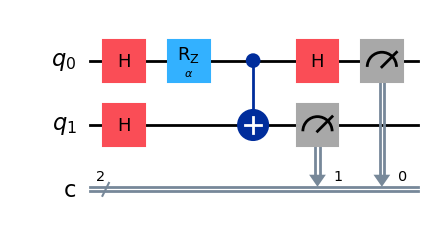

In [17]:
# BBA
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc_bba = QuantumCircuit(qr,cr)

# rho
qc_bba.h(0)
alpha_bba = Parameter(r'$\alpha$')
qc_bba.rz(alpha_bba,0)
# sigma
qc_bba.h(1)

qc_bba.cx(0,1)
qc_bba.h(0)
qc_bba.measure(0,0)
qc_bba.measure(1,1)
qc_bba.draw(output='mpl')

In [18]:
alpha_lst = np.linspace(0,2*np.pi,20)
ov_th = np.cos(alpha_lst/2)**2

ov_lst_swap = np.zeros(len(alpha_lst))
ov_lst_aba = np.zeros(len(alpha_lst))
ov_lst_bba = np.zeros(len(alpha_lst))

In [19]:
qc_list_swap = []
for i in range(len(alpha_lst)):
    ## swap
    # assign parameter (updated for Qiskit 1.0+)
    circuit_bind = qc_swap.assign_parameters({alpha_swap: alpha_lst[i]})
    # append qc to list
    qc_list_swap.append(circuit_bind)
# Run with X shots - Updated for Qiskit 1.0+
shots_ibm = nshots
t_qpe = transpile(qc_list_swap, backend, optimization_level=3)
# Use Sampler primitive for execution
sampler = Sampler(mode=backend)
job = sampler.run(t_qpe, shots=shots_ibm)
job_monitor(job, interval=2)
result = job.result()
# Extract counts from result (SamplerV2 format)
ibm_res_swap = []
for i in range(len(t_qpe)):
    counts = result[i].data.c.get_counts()
    ibm_res_swap.append(counts)

Job Status: QUEUED
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: DONE


In [20]:
qc_list_aba = []
for i in range(len(alpha_lst)):
    ## swap
    # assign parameter (updated for Qiskit 1.0+)
    circuit_bind = qc_aba.assign_parameters({alpha_aba: alpha_lst[i]})
    # append qc to list
    qc_list_aba.append(circuit_bind)
# Run with X shots - Updated for Qiskit 1.0+
shots_ibm = nshots
t_qpe = transpile(qc_list_aba, backend, optimization_level=3)
# Use Sampler primitive for execution
sampler = Sampler(mode=backend)
job = sampler.run(t_qpe, shots=shots_ibm)
job_monitor(job, interval=2)
result = job.result()
# Extract counts from result (SamplerV2 format)
ibm_res_aba = []
for i in range(len(t_qpe)):
    counts = result[i].data.c.get_counts()
    ibm_res_aba.append(counts)

Job Status: QUEUED
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: DONE


In [21]:
qc_list_bba = []
for i in range(len(alpha_lst)):
    ## swap
    # assign parameter (updated for Qiskit 1.0+)
    circuit_bind = qc_bba.assign_parameters({alpha_bba: alpha_lst[i]})
    # append qc to list
    qc_list_bba.append(circuit_bind)
# Run with X shots - Updated for Qiskit 1.0+
shots_ibm = nshots
t_qpe = transpile(qc_list_bba, backend, optimization_level=3)
# Use Sampler primitive for execution
sampler = Sampler(mode=backend)
job = sampler.run(t_qpe, shots=shots_ibm)
job_monitor(job, interval=2)
result = job.result()
# Extract counts from result (SamplerV2 format)
ibm_res_bba = []
for i in range(len(t_qpe)):
    counts = result[i].data.c.get_counts()
    ibm_res_bba.append(counts)

Job Status: QUEUED
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING
Job Status: DONE


In [22]:
# get overlap
for i in range(len(alpha_lst)):
    # swap
    p0 = 0;
    if '0' in ibm_res_swap[i]:
        p0 = ibm_res_swap[i]['0']/nshots
    ov_lst_swap[i] = 2*p0-1
    
    
    ## aba
    p0 = 0; p1 = 0;
    if '0' in ibm_res_aba[i]:
        p0 = ibm_res_aba[i]['0']/nshots
    if '1' in ibm_res_aba[i]:
        p1 = ibm_res_aba[i]['1']/nshots
    ov_lst_aba[i] = p0-p1
    
    
    ## bba
    p00 = 0; p01 = 0; p10 = 0; p11 = 0;
    if '00' in ibm_res_bba[i]:
        p00 = ibm_res_bba[i]['00']/nshots
    if '01' in ibm_res_bba[i]:
        p01 = ibm_res_bba[i]['01']/nshots
    if '10' in ibm_res_bba[i]:
        p10 = ibm_res_bba[i]['10']/nshots
    if '11' in ibm_res_bba[i]:
        p11 = ibm_res_bba[i]['11']/nshots
    ov_lst_bba[i] = p00 + p01 + p10 - p11

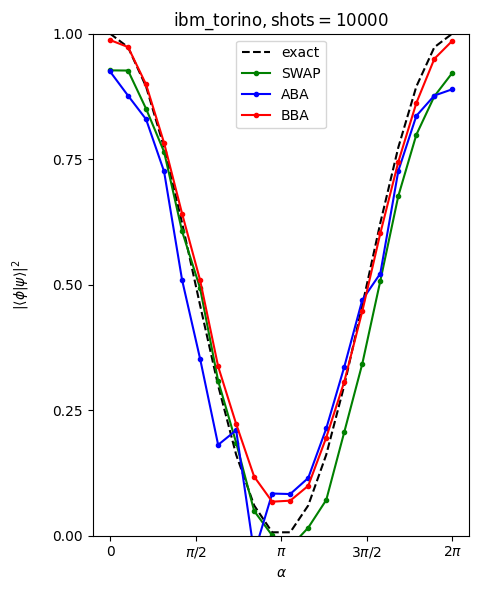

In [23]:
# plot reproducing FIG2
#plt.style.use("style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

plt.plot(alpha_lst,ov_th,'k--', label='exact')
plt.plot(alpha_lst,ov_lst_swap,'g.-', label='SWAP')
plt.plot(alpha_lst,ov_lst_aba,'b.-', label='ABA')
plt.plot(alpha_lst,ov_lst_bba,'r.-', label='BBA')
plt.ylim([0,1])

axes.set_xlabel(r'$\alpha$')
axes.set_ylabel(r'$|\langle \phi | \psi \rangle|^2$',labelpad=15)
axes.set_xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi])
axes.set_xticklabels([r'0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
axes.set_yticks([0,0.25,0.5,0.75,1])
# aspect
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (ymax-ymin)/(xmax-xmin)
axes.set_aspect(aspect=4/3/axesratio)
plt.legend(loc='upper center')
plt.title(r'$\mathrm{ibm \_torino, shots=10000}$')
plt.tight_layout()
plt.savefig('cincio2018_ibm_torino_10000shots.pdf')
plt.show()